In [1]:
import pandas as pd
import numpy as np
import os
from os import listdir
import glob
from glob import glob
from os.path import isfile, join
import shutil
import PIL
from PIL import Image
import random
import scipy as sp
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#df_folder = '/Users/ayesh/Downloads/seq_test3/complete_data/usable/'
df_folder = '/Users/ayesh/Downloads/right_thresh/4_sq/complete_data/usable/'

#path = '/Users/ayesh/Desktop/Fearmap_data/rotation_project/data/'
 
behav_files = [f for f in listdir(df_folder) if isfile(join(df_folder, f))]

csv_list = []

for a in behav_files:
    if a[-4:] == ".csv":
        csv_list.append(df_folder + a)

In [3]:
subid = []
avg_AB1 = []
avg_AB2 = []
avg_AB3 = []
avg_BC = []
avg_XY = []
avg_AC = []


total_avg_AB1 = []
total_avg_AB2 = []
total_avg_AB3 = []
total_avg_BC = []
total_avg_XY = []
total_avg_AC = []


for pt_file in csv_list:
    df = pd.read_csv(pt_file, header=0)
    df.columns = df.columns.str.replace(".", "_")
    df.replace(r'\s+',np.nan,regex=True).replace('',np.nan)
    participant_name = df.workerID[0]
    AB1corr = df.key_resp_corr
    AB2corr = df.key_resp_2_corr
    AB3corr = df.key_resp_3_corr
    BCXYcorr = df.key_resp_4_corr
    ACcorr = df.key_resp_5_corr
    #allgood_check = df.key_resp_33_keys[480]

    AB1_trialresp = df.key_resp_keys
    AB2_trialresp = df.key_resp_2_keys
    AB3_trialresp = df.key_resp_3_keys
    BCXY_trialresp = df.key_resp_4_keys
    AC_trialresp = df.key_resp_5_keys

    
    AB1_trialresp_rt = df.key_resp_rt
    AB2_trialresp_rt = df.key_resp_2_rt
    AB3_trialresp_rt = df.key_resp_3_rt
    BCXY_trialresp_rt = df.key_resp_4_rt
    AC_trialresp_rt = df.key_resp_5_rt
    overlap = df.test_overlap
    
    t_AB1trials = []
    t_AB2trials = []
    t_AB3trials = []
    t_BCtrials = []
    t_XYtrials = []
    t_ACtrials = []

    
    t_AB1corr = []
    t_AB2corr = []
    t_AB3corr = []
    t_BCcorr = []
    t_XYcorr = []
    t_ACcorr = []
    t_finalABcorr = []
    t_finalBCcorr = []
    
    for index, row in df.iterrows():
        try:
            
            if np.isnan(AB1_trialresp[index]) == False:
                t_AB1trials.append(AB1_trialresp_rt[index])
            total_AB1resp = np.mean(t_AB1trials)

            if AB1corr[index] == 1:
                t_AB1corr.append(AB1_trialresp_rt[index])
            prop_correct = np.mean(t_AB1corr)

            if np.isnan(AB2_trialresp[index]) == False:
                t_AB2trials.append(AB2_trialresp_rt[index])
            total_AB2resp = np.mean(t_AB2trials)

            if AB2corr[index] == 1:
                t_AB2corr.append(AB2_trialresp_rt[index])
            prop_correct2 = np.mean(t_AB2corr)

            if np.isnan(AB3_trialresp[index]) == False:
                t_AB3trials.append(AB3_trialresp_rt[index])
            total_AB3resp = np.mean(t_AB3trials)

            if AB3corr[index] == 1:
                t_AB3corr.append(AB3_trialresp_rt[index])
            prop_correct3 = np.mean(t_AB3corr)

            if np.isnan(BCXY_trialresp[index]) == False and overlap[index] == 'BC':
                t_BCtrials.append(BCXY_trialresp_rt[index])
            total_BCresp = np.mean(t_BCtrials)

            if BCXYcorr[index] == 1 and overlap[index] == 'BC':
                t_BCcorr.append(BCXY_trialresp_rt[index])
            prop_correctBC = np.mean(t_BCcorr)
            
            if np.isnan(BCXY_trialresp[index]) == False and overlap[index] == 'XY':
                t_XYtrials.append(BCXY_trialresp_rt[index])
            total_XYresp = np.mean(t_XYtrials)

            if BCXYcorr[index] == 1 and overlap[index] == 'XY':
                t_XYcorr.append(BCXY_trialresp_rt[index])
            prop_correctXY = np.mean(t_XYcorr)

            if np.isnan(AC_trialresp[index]) == False:
                t_ACtrials.append(AC_trialresp_rt[index])
            total_ACresp = np.mean(t_ACtrials)

            if ACcorr[index] == 1:
                t_ACcorr.append(AC_trialresp_rt[index])
            prop_correctAC = np.mean(t_ACcorr)
            
        except:
            pass
        
    subid.append(participant_name)
    avg_AB1.append(prop_correct)
    avg_AB2.append(prop_correct2)
    avg_AB3.append(prop_correct3)
    avg_BC.append(prop_correctBC)
    avg_XY.append(prop_correctXY)
    avg_AC.append(prop_correctAC)
   
    
    total_avg_AB1.append(total_AB1resp)
    total_avg_AB2.append(total_AB2resp)
    total_avg_AB3.append(total_AB3resp)
    total_avg_BC.append(total_BCresp)
    total_avg_XY.append(total_XYresp)
    total_avg_AC.append(total_ACresp)

C:\Users\ayesh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ayesh\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [4]:
my_df = pd.DataFrame(list(zip(subid, avg_AB1, avg_AB2, avg_AB3, avg_BC, avg_XY, avg_AC)), 
                     columns = ['participant', 'Avg AB1', 'Avg AB2', 'Avg AB3', 'Avg BC', 'Avg XY','Avg AC'])

my_df.to_csv(r'/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mTurk_pavlovia_data/SEQ_summary/overall_RT.csv', index = False, header = True)
my_df.head()

,participant,Avg AB1,Avg AB2,Avg AB3,Avg BC,Avg XY,Avg AC
0,A13B52O6OQBPO,1.219648,1.058215,0.738682,1.057497,1.207594,1.399932
1,A18E16UFE351U6,1.115108,0.909764,0.763294,0.980186,1.255022,2.008409
2,A19L8SNH73AX1Z,0.885423,0.881750,0.683476,0.677368,0.460733,1.300667
3,A1DCG37N0Y8BN0,0.941373,0.868182,0.726684,0.978388,1.012863,1.867951
4,A1FYFBIFYWTMJS,0.742091,0.980783,0.948022,0.873911,0.915565,1.584285


In [5]:
total_df = pd.DataFrame(list(zip(subid, total_avg_AB1, total_avg_AB2, total_avg_AB3, total_avg_BC, total_avg_XY, total_avg_AC)), 
                     columns = ['participant', 'T Avg AB1', 'T Avg AB2', 'T Avg AB3', 'T Avg BC', 'T Avg XY', 'T Avg AC'])

total_df.head()

,participant,T Avg AB1,T Avg AB2,T Avg AB3,T Avg BC,T Avg XY,T Avg AC
0,A13B52O6OQBPO,1.280875,1.127228,0.789557,1.203856,1.299321,1.517804
1,A18E16UFE351U6,1.186744,1.037889,0.775219,1.048952,1.338233,2.100604
2,A19L8SNH73AX1Z,0.873104,0.907771,0.724083,0.644521,0.554125,1.331417
3,A1DCG37N0Y8BN0,1.020242,0.930592,0.778779,1.014252,1.048150,1.976048
4,A1FYFBIFYWTMJS,0.751613,1.013277,1.035602,0.976894,0.912072,1.382475


In [6]:
melted_df = pd.melt(my_df, id_vars=['participant'], value_vars=['Avg AB1', 'Avg AB2', 'Avg AB3', 'Avg BC', 'Avg XY', 'Avg AC'], var_name='condition', value_name='Total_acc')
melted_df.head()

,participant,condition,Total_acc
0,A13B52O6OQBPO,Avg AB1,1.219648
1,A18E16UFE351U6,Avg AB1,1.115108
2,A19L8SNH73AX1Z,Avg AB1,0.885423
3,A1DCG37N0Y8BN0,Avg AB1,0.941373
4,A1FYFBIFYWTMJS,Avg AB1,0.742091


In [7]:
t_melted_df = pd.melt(total_df, id_vars=['participant'], value_vars=['T Avg AB1', 'T Avg AB2', 'T Avg AB3', 'T Avg BC', 'T Avg XY', 'T Avg AC'], var_name='condition', value_name='Total_acc')
t_melted_df.head()

,participant,condition,Total_acc
0,A13B52O6OQBPO,T Avg AB1,1.280875
1,A18E16UFE351U6,T Avg AB1,1.186744
2,A19L8SNH73AX1Z,T Avg AB1,0.873104
3,A1DCG37N0Y8BN0,T Avg AB1,1.020242
4,A1FYFBIFYWTMJS,T Avg AB1,0.751613


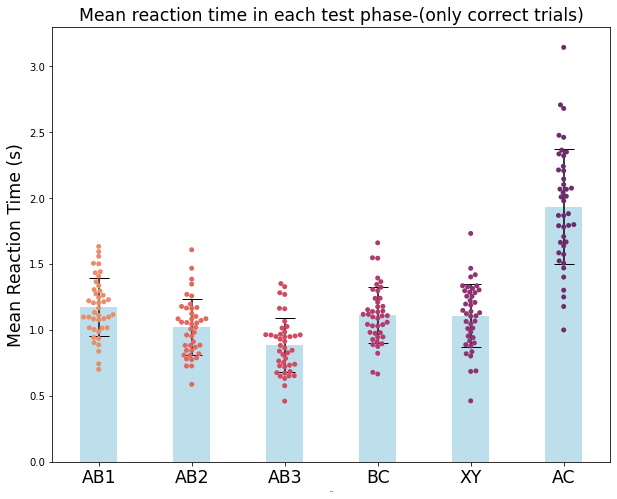

In [8]:
AB1_mean = np.mean(avg_AB1)
AB2_mean = np.mean(avg_AB2)
AB3_mean = np.mean(avg_AB3)
BC_mean = np.mean(avg_BC)
XY_mean = np.mean(avg_XY)
AC_mean = np.mean(avg_AC)

AB1_std = np.std(avg_AB1)
AB2_std = np.std(avg_AB2)
AB3_std = np.std(avg_AB3)
BC_std = np.std(avg_BC)
XY_std = np.std(avg_XY)
AC_std = np.std(avg_AC)


# Define labels, positions, bar heights and error bar heights
labels = ['AB1', 'AB2', 'AB3', 'BC', 'XY', 'AC']
x_pos = np.arange(len(labels))
CTEs = [AB1_mean, AB2_mean, AB3_mean, BC_mean, XY_mean, AC_mean]
error = [AB1_std, AB2_std, AB3_std, BC_std, XY_std, AC_std]

# Build the plot
fig, ax = plt.subplots(figsize=(10,8))
sns.swarmplot(data=melted_df, y = 'Total_acc', x = 'condition', palette = 'flare', ax = ax)

ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.8,
       width=0.4,
       color='lightblue',
       ecolor='black',
       capsize=10)
ax.set_ylabel('Mean Reaction Time (s)', fontsize = 'xx-large')
ax.set_xlabel('Test', fontsize = 2)
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize = 'xx-large')
ax.set_title('Mean reaction time in each test phase-'
             '(only correct trials)', fontsize = 'xx-large')

# ### swarmplot
red = '#c04e01'
blue = '#0165fc'

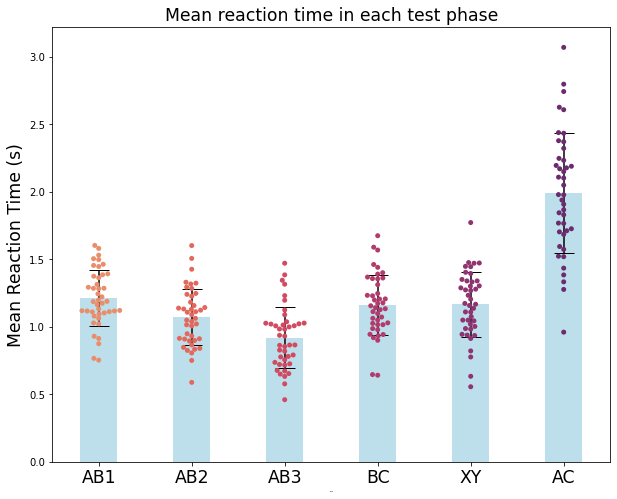

In [9]:
AB1_mean = np.mean(total_avg_AB1)
AB2_mean = np.mean(total_avg_AB2)
AB3_mean = np.mean(total_avg_AB3)
BC_mean = np.mean(total_avg_BC)
XY_mean = np.mean(total_avg_XY)
AC_mean = np.mean(total_avg_AC)


AB1_std = np.std(total_avg_AB1)
AB2_std = np.std(total_avg_AB2)
AB3_std = np.std(total_avg_AB3)
BC_std = np.std(total_avg_BC)
XY_std = np.std(total_avg_XY)
AC_std = np.std(total_avg_AC)


# Define labels, positions, bar heights and error bar heights
labels = ['AB1', 'AB2', 'AB3', 'BC', 'XY', 'AC']
x_pos = np.arange(len(labels))
CTEs = [AB1_mean, AB2_mean, AB3_mean, BC_mean, XY_mean, AC_mean]
error = [AB1_std, AB2_std, AB3_std, BC_std, XY_std, AC_std]

# Build the plot
fig, ax = plt.subplots(figsize=(10,8))
sns.swarmplot(data=t_melted_df, y = 'Total_acc', x = 'condition', palette = 'flare', ax = ax)

ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.8,
       width=0.4,
       color='lightblue',
       ecolor='black',
       capsize=10)
ax.set_ylabel('Mean Reaction Time (s)', fontsize = 'xx-large')
ax.set_xlabel('Test', fontsize = 2)
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize = 'xx-large')
ax.set_title('Mean reaction time in each test phase', fontsize = 'xx-large')

# ### swarmplot
red = '#c04e01'
blue = '#0165fc'

# JUNK _________________________________

In [10]:
#df = print(df.replace(r'^\s*$', np.nan, regex=True))

subid = []
avg_AB1_neu = []
avg_AB2_neu = []
avg_AB3_neu = []
avg_BC_neu = []
avg_XY_neu = []
avg_AC_neu = []


avg_AB1_emo = []
avg_AB2_emo = []
avg_AB3_emo = []
avg_BC_emo = []
avg_XY_emo = []
avg_AC_emo = []


for pt_file in csv_list:
    df = pd.read_csv(pt_file, header=0)
    df.columns = df.columns.str.replace(".", "_")
    df.replace(r'\s+',np.nan,regex=True).replace('',np.nan)
    participant_name = df.workerID[0]
    AB1corr = df.key_resp_corr
    AB2corr = df.key_resp_2_corr
    AB3corr = df.key_resp_3_corr
    BCXYcorr = df.key_resp_4_corr
    ACcorr = df.key_resp_5_corr
   

    AB1_trialresp = df.key_resp_keys
    AB2_trialresp = df.key_resp_2_keys
    AB3_trialresp = df.key_resp_3_keys
    BCXY_trialresp = df.key_resp_4_keys
    AC_trialresp = df.key_resp_5_keys
  
    
    AB1_trialresp_rt = df.key_resp_rt
    AB2_trialresp_rt = df.key_resp_2_rt
    AB3_trialresp_rt = df.key_resp_3_rt
    BCXY_trialresp_rt = df.key_resp_4_rt
    AC_trialresp_rt = df.key_resp_5_rt

    
    AB1_trialtype = df.test1_face_image
    AB2_trialtype = df.test2_face_image
    AB3_trialtype = df.test3_face_image
    BCXY_trialtype = df.testBC_face_image
    ACobjectcue = df.testAC_objectC_image

    
    ACobjectA = df.orig_objectA_image
    ACobjectC = df.objectC_image4
    overlapB_faceimage = df.face_image4
    overlap_list = []
    emo_faced = []
    neu_faced = []
    test = []
    overlap = df.test_overlap

    t_AB1trials = []
    t_AB2trials = []
    t_AB3trials = []
    t_BCtrials = []
    t_XYtrials = []
    t_ACtrials = []
  
    
    fear_AB1trials = []
    fear_AB2trials = []
    fear_AB3trials = []
    fear_BCtrials = []
    fear_XYtrials = []
    fear_ACtrials = []
    
    neut_AB1trials = []
    neut_AB2trials = []
    neut_AB3trials = []
    neut_BCtrials = []
    neut_XYtrials = []
    neut_ACtrials = []
    
    f_AB1corr = []
    f_AB2corr = []
    f_AB3corr = []
    f_BCcorr = []
    f_XYcorr = []
    f_ACcorr = []
    
    n_AB1corr = []
    n_AB2corr = []
    n_AB3corr = []
    n_BCcorr = []
    n_XYcorr = []
    n_ACcorr = []
    
    
    for index, row in df.iterrows():
        if pd.isnull(ACobjectC[index]) == False:
            overlap_valence = overlapB_faceimage[index]
            if overlap_valence[2:6] == 'fear':
                emo_faced.append(ACobjectC[index])
            if overlap_valence[2:6] == 'neut':
                neu_faced.append(ACobjectC[index]) 
    
    for index, row in df.iterrows():         
        if ACobjectcue[index] in emo_faced:
            fear_ACtrials.append(ACobjectcue[index])
            if ACcorr[index] == 1:
                f_ACcorr.append(AC_trialresp_rt[index])
                
        if ACobjectcue[index] in neu_faced:
            neut_ACtrials.append(ACobjectcue[index])
            if ACcorr[index] == 1:
                n_ACcorr.append(AC_trialresp_rt[index]) 
    try:   
        prop_correctAC_emo = np.mean(f_ACcorr)
        prop_correctAC_neut = np.mean(n_ACcorr)
    except:
        pass
            
    for index, row in df.iterrows():
        valence1 = AB1_trialtype[index]
        valence2 = AB2_trialtype[index]
        valence3 = AB3_trialtype[index]
        valenceBC = BCXY_trialtype[index]
      
        if np.isnan(AB1_trialresp[index]) == False:
            #valence1 = AB1_trialtype[index]
            if valence1[2:6] == 'fear':
                fear_AB1trials.append(AB1_trialresp_rt[index])
                if AB1corr[index] == 1:
                    f_AB1corr.append(AB1_trialresp_rt[index])
            if valence1[2:6] == 'neut':
                neut_AB1trials.append(AB1_trialresp_rt[index])
                if AB1corr[index] == 1:
                    n_AB1corr.append(AB1_trialresp_rt[index])

        #prop_correct_emo = len(f_AB1corr)/len(fear_AB1trials)
        #prop_correct_neut = len(n_AB1corr)/len(neut_AB1trials)

        ##################################################################

        if np.isnan(AB2_trialresp[index]) == False:
            if valence2[2:6] == 'fear':
                fear_AB2trials.append(AB2_trialresp_rt[index])
                if AB2corr[index] == 1:
                    f_AB2corr.append(AB2_trialresp_rt[index])
            if valence2[2:6] == 'neut':
                neut_AB2trials.append(AB2_trialresp_rt[index])
                if AB2corr[index] == 1:
                    n_AB2corr.append(AB2_trialresp_rt[index])

       #################################################################

        if np.isnan(AB3_trialresp[index]) == False:
            if valence3[2:6] == 'fear':
                fear_AB3trials.append(AB3_trialresp_rt[index])
                if AB3corr[index] == 1:
                    f_AB3corr.append(AB3_trialresp_rt[index])
            elif valence3[2:6] == 'neut':
                neut_AB3trials.append(AB3_trialresp_rt[index])
                if AB3corr[index] == 1:
                    n_AB3corr.append(AB3_trialresp_rt[index])

        ######################################################################

        if np.isnan(BCXY_trialresp[index]) == False and overlap[index] == 'BC':
            if valenceBC[2:6] == 'fear':
                fear_BCtrials.append(BCXY_trialresp_rt[index])
                if BCXYcorr[index] == 1:
                    f_BCcorr.append(BCXY_trialresp_rt[index])
            elif valenceBC[2:6] == 'neut':
                neut_BCtrials.append(BCXY_trialresp_rt[index])
                if BCXYcorr[index] == 1:
                    n_BCcorr.append(BCXY_trialresp_rt[index])

        #############################################################
        
        if np.isnan(BCXY_trialresp[index]) == False and overlap[index] == 'XY':
            if valenceBC[2:6] == 'fear':
                fear_XYtrials.append(BCXY_trialresp_rt[index])
                if BCXYcorr[index] == 1:
                    f_XYcorr.append(BCXY_trialresp_rt[index])
            elif valenceBC[2:6] == 'neut':
                neut_XYtrials.append(BCXY_trialresp_rt[index])
                if BCXYcorr[index] == 1:
                    n_XYcorr.append(BCXY_trialresp_rt[index])

        #############################################################


                    
    try:
        prop_correct_emo = np.mean(f_AB1corr)
        prop_correct_neut = np.mean(n_AB1corr)
        prop_correct2_emo = np.mean(f_AB2corr)
        prop_correct2_neut = np.mean(n_AB2corr)
        prop_correct3_emo = np.mean(f_AB3corr)
        prop_correct3_neut = np.mean(n_AB3corr)
        prop_correctBC_emo = np.mean(f_BCcorr)
        prop_correctBC_neut = np.mean(n_BCcorr)
        prop_correctXY_emo = np.mean(f_XYcorr)
        prop_correctXY_neut = np.mean(n_XYcorr)

    except:
            pass
       
    ##############################################################################
    ## THE AC TEST!! 

    subid.append(participant_name)

    avg_AB1_neu.append(prop_correct_neut)
    avg_AB2_neu.append(prop_correct2_neut)
    avg_AB3_neu.append(prop_correct3_neut)
    avg_BC_neu.append(prop_correctBC_neut)
    avg_XY_neu.append(prop_correctXY_neut)
    avg_AC_neu.append(prop_correctAC_neut)

    avg_AB1_emo.append(prop_correct_emo)
    avg_AB2_emo.append(prop_correct2_emo)
    avg_AB3_emo.append(prop_correct3_emo)
    avg_BC_emo.append(prop_correctBC_emo)
    avg_XY_emo.append(prop_correctXY_emo)
    avg_AC_emo.append(prop_correctAC_emo)
    

In [11]:
val_df = pd.DataFrame(list(zip(subid, avg_AB1_neu, avg_AB2_neu, avg_AB3_neu, avg_BC_neu, avg_XY_neu, avg_AC_neu, avg_AB1_emo, avg_AB2_emo, avg_AB3_emo, avg_BC_emo, avg_XY_emo, avg_AC_emo)), 
                     columns = ['participant', 'Avg AB1', 'Avg AB2', 'Avg AB3', 'Avg BC', 'Avg XY', 'Avg AC', 'Avg AB1_emo', 'Avg AB2_emo', 'Avg AB3_emo', 'Avg BC_emo', 'Avg XY_emo', 'Avg AC_emo'])

val_df.to_csv(r'/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mTurk_pavlovia_data/SEQ_summary/overall_RT_valence.csv', index = False, header = True)
val_df

,participant,Avg AB1,Avg AB2,Avg AB3,Avg BC,Avg XY,Avg AC,Avg AB1_emo,Avg AB2_emo,Avg AB3_emo,Avg BC_emo,Avg XY_emo,Avg AC_emo
0,A13B52O6OQBPO,1.158250,1.005326,0.736839,1.013244,1.217606,1.538663,1.285769,1.108460,0.740700,1.114393,1.195436,1.224207
1,A18E16UFE351U6,1.111500,0.799440,0.715983,0.952320,1.145160,1.906376,1.120027,1.025895,0.808633,1.012971,1.438125,2.104772
2,A19L8SNH73AX1Z,0.882467,0.820667,0.687565,0.640400,0.529375,1.109400,0.889455,0.967267,0.678526,0.718444,0.382286,1.539750
3,A1DCG37N0Y8BN0,0.806123,0.686164,0.603154,0.895832,0.998605,1.662078,1.139740,1.118456,0.882721,1.069200,1.030476,2.163894
4,A1FYFBIFYWTMJS,0.787720,0.755818,0.988124,0.850700,0.939520,1.698583,0.704067,1.187000,0.895388,0.897121,0.882900,1.486314
5,A1JJYY622DGE5L,0.998083,0.612004,0.438575,0.943953,0.767917,1.244474,1.246100,0.557591,0.477888,0.827511,1.021153,1.253761
6,A1MF5X99676P61A1MF5X99676P61,1.129911,0.785791,0.833492,1.066725,0.825338,2.278767,1.299943,0.788818,0.817942,0.739507,0.764767,1.770938
7,A1P6OXEJ86HQRM,1.196687,1.114830,0.867583,1.223747,1.222555,1.745442,1.456953,1.420470,1.105987,1.368207,1.318206,1.823410
8,A1PTH9KTRO06EG,1.132750,0.999095,0.817885,1.269100,1.149210,2.334783,1.035733,1.206638,1.138444,1.443531,1.294780,2.667855
9,A1SSRLN5QFFXSM,0.838150,1.457044,1.212721,1.116222,1.095656,2.282375,0.424033,1.256791,1.311589,1.118750,0.809011,2.405167


In [12]:
valence_df = pd.melt(val_df, id_vars=['participant'], value_vars=['Avg AB1', 'Avg AB2', 'Avg AB3', 'Avg BC', 'Avg XY', 'Avg AC', 'Avg AB1_emo', 'Avg AB2_emo', 'Avg AB3_emo', 'Avg BC_emo', 'Avg XY_emo', 'Avg AC_emo'], var_name='condition', value_name='Total_acc')
valence_df

,participant,condition,Total_acc
0,A13B52O6OQBPO,Avg AB1,1.158250
1,A18E16UFE351U6,Avg AB1,1.111500
2,A19L8SNH73AX1Z,Avg AB1,0.882467
3,A1DCG37N0Y8BN0,Avg AB1,0.806123
4,A1FYFBIFYWTMJS,Avg AB1,0.787720
...,...,...,...
499,A2V8CV9H3U2M5P,Avg AC_emo,1.245136
500,A35KSAHOAK9CAI,Avg AC_emo,1.617800
501,A4158R4Y06ZB4,Avg AC_emo,2.191235
502,ATOV0H5KQHI29,Avg AC_emo,1.774054


In [13]:
valence_df.loc[valence_df['condition'] == 'Avg AB1', 'valence'] = 'c-neutral'
valence_df.loc[valence_df['condition'] == 'Avg AB2', 'valence'] = 'c-neutral'
valence_df.loc[valence_df['condition'] == 'Avg AB3', 'valence'] = 'c-neutral'
valence_df.loc[valence_df['condition'] == 'Avg BC', 'valence'] = 'c-neutral'
valence_df.loc[valence_df['condition'] == 'Avg XY', 'valence'] = 'c-neutral'
valence_df.loc[valence_df['condition'] == 'Avg AC', 'valence'] = 'c-neutral'

valence_df.loc[valence_df['condition'] == 'Avg AB1_emo', 'valence'] = 'fearful'
valence_df.loc[valence_df['condition'] == 'Avg AB2_emo', 'valence'] = 'fearful'
valence_df.loc[valence_df['condition'] == 'Avg AB3_emo', 'valence'] = 'fearful'
valence_df.loc[valence_df['condition'] == 'Avg BC_emo', 'valence'] = 'fearful'
valence_df.loc[valence_df['condition'] == 'Avg XY_emo', 'valence'] = 'fearful'
valence_df.loc[valence_df['condition'] == 'Avg AC_emo', 'valence'] = 'fearful'


In [14]:
valence_df

,participant,condition,Total_acc,valence
0,A13B52O6OQBPO,Avg AB1,1.158250,c-neutral
1,A18E16UFE351U6,Avg AB1,1.111500,c-neutral
2,A19L8SNH73AX1Z,Avg AB1,0.882467,c-neutral
3,A1DCG37N0Y8BN0,Avg AB1,0.806123,c-neutral
4,A1FYFBIFYWTMJS,Avg AB1,0.787720,c-neutral
...,...,...,...,...
499,A2V8CV9H3U2M5P,Avg AC_emo,1.245136,fearful
500,A35KSAHOAK9CAI,Avg AC_emo,1.617800,fearful
501,A4158R4Y06ZB4,Avg AC_emo,2.191235,fearful
502,ATOV0H5KQHI29,Avg AC_emo,1.774054,fearful


In [15]:
comp_df = pd.melt(val_df, id_vars=['participant'], value_vars=['Avg AB3', 'Avg AB3_emo', 'Avg BC', 'Avg BC_emo', 'Avg XY', 'Avg XY_emo', 'Avg AC', 'Avg AC_emo'], var_name='condition', value_name='Total_acc')
comp_df

,participant,condition,Total_acc
0,A13B52O6OQBPO,Avg AB3,0.736839
1,A18E16UFE351U6,Avg AB3,0.715983
2,A19L8SNH73AX1Z,Avg AB3,0.687565
3,A1DCG37N0Y8BN0,Avg AB3,0.603154
4,A1FYFBIFYWTMJS,Avg AB3,0.988124
...,...,...,...
331,A2V8CV9H3U2M5P,Avg AC_emo,1.245136
332,A35KSAHOAK9CAI,Avg AC_emo,1.617800
333,A4158R4Y06ZB4,Avg AC_emo,2.191235
334,ATOV0H5KQHI29,Avg AC_emo,1.774054


In [16]:
comp_df.loc[comp_df['condition'] == 'Avg AB3', 'valence'] = 'c-neutral'
comp_df.loc[comp_df['condition'] == 'Avg BC', 'valence'] = 'c-neutral'
comp_df.loc[comp_df['condition'] == 'Avg XY', 'valence'] = 'c-neutral'
comp_df.loc[comp_df['condition'] == 'Avg AC', 'valence'] = 'c-neutral'


comp_df.loc[comp_df['condition'] == 'Avg AB3_emo', 'valence'] = 'fearful'
comp_df.loc[comp_df['condition'] == 'Avg BC_emo', 'valence'] = 'fearful'
comp_df.loc[comp_df['condition'] == 'Avg XY_emo', 'valence'] = 'fearful'
comp_df.loc[comp_df['condition'] == 'Avg AC_emo', 'valence'] = 'fearful'

comp_df.loc[comp_df['condition'] == 'Avg AB3', 'Test'] = 'AB3'
comp_df.loc[comp_df['condition'] == 'Avg BC', 'Test'] = 'BC'
comp_df.loc[comp_df['condition'] == 'Avg XY', 'Test'] = 'XY'
comp_df.loc[comp_df['condition'] == 'Avg AC', 'Test'] = 'AC'

comp_df.loc[comp_df['condition'] == 'Avg AB3_emo', 'Test'] = 'AB3'
comp_df.loc[comp_df['condition'] == 'Avg BC_emo', 'Test'] = 'BC'
comp_df.loc[comp_df['condition'] == 'Avg XY_emo', 'Test'] = 'XY'
comp_df.loc[comp_df['condition'] == 'Avg AC_emo', 'Test'] = 'AC'

In [17]:
comp_df

,participant,condition,Total_acc,valence,Test
0,A13B52O6OQBPO,Avg AB3,0.736839,c-neutral,AB3
1,A18E16UFE351U6,Avg AB3,0.715983,c-neutral,AB3
2,A19L8SNH73AX1Z,Avg AB3,0.687565,c-neutral,AB3
3,A1DCG37N0Y8BN0,Avg AB3,0.603154,c-neutral,AB3
4,A1FYFBIFYWTMJS,Avg AB3,0.988124,c-neutral,AB3
...,...,...,...,...,...
331,A2V8CV9H3U2M5P,Avg AC_emo,1.245136,fearful,AC
332,A35KSAHOAK9CAI,Avg AC_emo,1.617800,fearful,AC
333,A4158R4Y06ZB4,Avg AC_emo,2.191235,fearful,AC
334,ATOV0H5KQHI29,Avg AC_emo,1.774054,fearful,AC


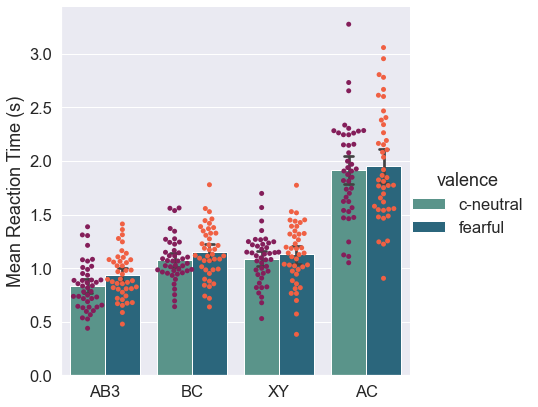

In [18]:
sns.set(font_scale = 1.5)
g = sns.catplot(x="Test", y="Total_acc", hue="valence", data=comp_df,
 height=6, kind="bar", palette="crest", capsize=.1)
g = sns.swarmplot(x="Test", y="Total_acc", hue="valence", data=comp_df, palette="rocket", dodge=True)
g.legend_.remove()
#g.figure.savefig('mean_bias_context_age_source_corr_bars.pdf')
#plt.ylim(-0.1, 1.05)
plt.ylabel("Mean Reaction Time (s)")
plt.xlabel('')
plt.show()

In [19]:
AB_comp_df = pd.melt(val_df, id_vars=['participant'], value_vars=['Avg BC', 'Avg BC_emo','Avg ABfinal', 'Avg ABfinal_emo'], var_name='condition', value_name='Total_acc')
AB_comp_df

,participant,condition,Total_acc
0,A0017268R9SKD8U2Y3F,Avg BC,0.841408
1,A12HWPFXQPITHD,Avg BC,1.232893
2,A16G6PPH1INQL8,Avg BC,1.000255
3,A1C5SQZ045W0L5,Avg BC,1.270329
4,A1IFIK8J49WBER,Avg BC,0.906748
...,...,...,...
115,A3EHDY67QENKPT,Avg ABfinal_emo,0.771229
116,A3JTDNRJYVCGQD,Avg ABfinal_emo,0.718446
117,A38I0E8UK53ME5,Avg ABfinal_emo,1.037056
118,A1F6MWP9A0XLJQ,Avg ABfinal_emo,1.010253


In [109]:
AB_comp_df.loc[AB_comp_df['condition'] == 'Avg BC', 'valence'] = 'c-neutral'
AB_comp_df.loc[AB_comp_df['condition'] == 'Avg ABfinal', 'valence'] = 'c-neutral'

AB_comp_df.loc[AB_comp_df['condition'] == 'Avg BC_emo', 'valence'] = 'fearful'
AB_comp_df.loc[AB_comp_df['condition'] == 'Avg ABfinal_emo', 'valence'] = 'fearful'

AB_comp_df.loc[AB_comp_df['condition'] == 'Avg BC', 'Test'] = 'BC'
AB_comp_df.loc[AB_comp_df['condition'] == 'Avg ABfinal', 'Test'] = 'AB'

AB_comp_df.loc[AB_comp_df['condition'] == 'Avg BC_emo', 'Test'] = 'BC'
AB_comp_df.loc[AB_comp_df['condition'] == 'Avg ABfinal_emo', 'Test'] = 'AB'


In [110]:
AB_comp_df

,participant,condition,Total_acc,valence,Test
0,A0017268R9SKD8U2Y3F,Avg BC,0.841408,c-neutral,BC
1,A12HWPFXQPITHD,Avg BC,1.232893,c-neutral,BC
2,A16G6PPH1INQL8,Avg BC,1.000255,c-neutral,BC
3,A1C5SQZ045W0L5,Avg BC,1.270329,c-neutral,BC
4,A1IFIK8J49WBER,Avg BC,0.906748,c-neutral,BC
...,...,...,...,...,...
115,A3EHDY67QENKPT,Avg ABfinal_emo,0.771229,fearful,AB
116,A3JTDNRJYVCGQD,Avg ABfinal_emo,0.718446,fearful,AB
117,A38I0E8UK53ME5,Avg ABfinal_emo,1.037056,fearful,AB
118,A1F6MWP9A0XLJQ,Avg ABfinal_emo,1.010253,fearful,AB


Text(0, 0.5, 'Response Time (s)')

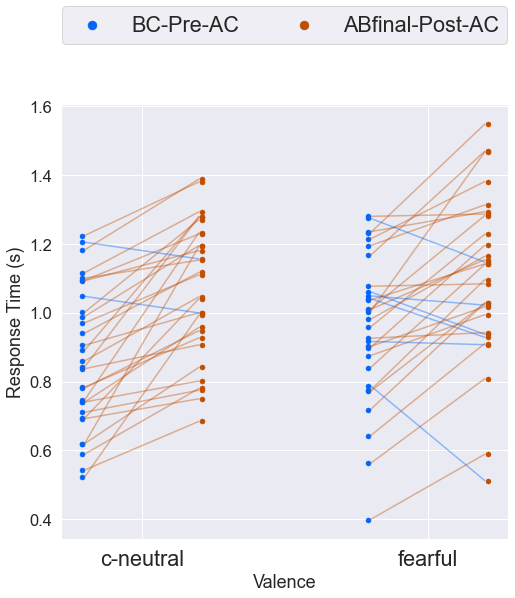

In [112]:
#check for interference
#here if there is a difference between pre and post AC test, it will be indicated by different colors. 
#If pre AC performance is better than the post AC performance, line is blue, otherwise red!
#note that if there is no difference, i.e, if pre-post = 0, the line is still red!
red = '#c04e01'
blue = '#0165fc'
fig, ax = plt.subplots(figsize=(8, 8))

# Set up list to track sites
valences = []

i = 1.0
for valence, subdf in AB_comp_df.groupby('valence'):
    valences.append(valence)
    # Get the values for healthy and disease patients
    h = subdf.query('Test == "AB"')['Total_acc'].values
    d = subdf.query('Test == "BC"')['Total_acc'].values
    # Set up the x-axis values
    x1 = i - 0.2
    x2 = i + 0.2
 # Set up line color
    line_colors = (h - d) > 0
    line_colors = [blue if j else red for j in line_colors]
    # Also set up alpha values to make the lines slightly transparent
    alphas = [0.4]*len(line_colors)
    # Plot the lines connecting the dots
    for hi, di, ci, ai in zip(h, d, line_colors, alphas):
        ax.plot([x1, x2], [hi, di], c=ci, alpha=ai)
 # Plot the points
 # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
    ax.scatter(len(h)*[x1-0.01], h, c=blue,
    s=25, lw=0.5, label='BC-Pre-AC')
    ax.scatter(len(d)*[x2+0.01], d, c=red,
    s=25, lw=0.5, label='ABfinal-Post-AC')
 # Update x-axis
    i += 1
# Fix the axes and labels
ax.set_xticks([1, 2])
_ = ax.set_xticklabels(valences, fontsize='large')
# Add legend and fix it to show only the first two elements
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:2], labels[0:2],
    fontsize='large',
    loc='upper center',
    bbox_to_anchor=(0.5, 1.25),
    ncol=2,
    scatterpoints=1)
lgd.legendHandles[0]._sizes = [80]
lgd.legendHandles[1]._sizes = [80]
ax.set_xlabel('Valence')
ax.set_ylabel('Response Time (s)')
    #fig.savefig('mean_bias_context_age_source_corr_points.pdf')